# Linear Regression
##### link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Linear regression finds the best-fit line between input (X) and output (Y) to predict Y from X. It minimizes errors between actual and predicted values.
The equation for simple linear regression is:

## Simple Linear Regression Function
### $ \hat{y} = mx + b $
- $ \hat{y}$: predicted output
- 𝑥: input
- 𝑚: slope of the line (coefficient)
- 𝑏: y-intercept

Linear regression in **[scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)** is a method to model the relationship between a dependent variable (y) and one or more independent variables (X). It fits a line that minimizes the difference between the predicted and actual values of y.

**Basic steps:**
- Import LinearRegression from sklearn.linear_model.
- Fit the model using fit(X, y) where X is the input data and y is the target.
- Predict with predict(X) to get the predicted values.


##### Example:

In [557]:
#Example - Scikit learn linear regression model
from sklearn.linear_model import LinearRegression

# Sample data
X = [[1], [2], [3], [4]] #independent variable (input)
y = [2, 3, 5, 7] #dependent variable (output)

# Create model
model = LinearRegression()

# Train model
model.fit(X, y) #fit() trains the model by finding the >best-fit line< for the data (X, y).

# Predict
predictions = model.predict([[5]]) #  predict() uses the trained model 
                                    # to predict the value of y when X = 5
print(predictions)  # Output will be predicted y for X=5
print("-"*40,"End of example","-"*40)


[8.5]
---------------------------------------- End of example ----------------------------------------


Large scale project with multiple x values: **Housing Price Predicions**
https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression
(This is a full project with data cleaning etc.)


#### ------------------ LECTURE material ---------------------------

Step 1, import the things we probably always want

In [558]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [559]:
#import and stylise data visualisation 
import matplotlib
matplotlib.style.use('ggplot')

Let's take this set

X has values 5,7,9,11,13,15

y has 11,14,20,24,29,31

and we want to build a model
$\hat{y} = w_0 + w_1x$

In [560]:
X = np.array([5, 7, 9, 11, 13, 15]) # this will have to be converted to 2D array for Scikit-learn
y = np.array([11, 14, 20, 24, 29, 31])

Let's plot it to see if a linear model makes sense for this

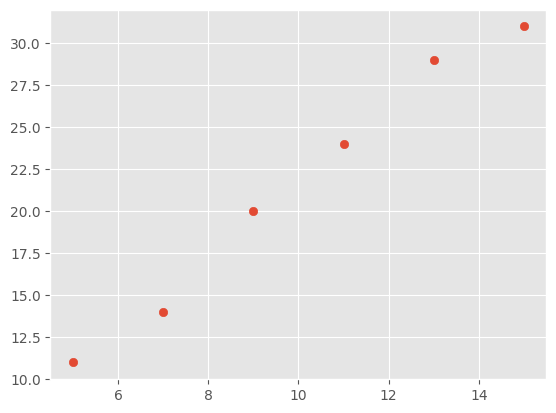

correlation:


array([[1.        , 0.99322298],
       [0.99322298, 1.        ]])

In [561]:
plt.scatter(X,y)
plt.show()
print("correlation:")
np.corrcoef(X, y)

The data looks linear which means it may be suitable for a Linear regression model.
Correlation coefficient is also very high @ 0.99322 supporting above suggestion.

## Data Structure: let's look at X and y in more detail
In NumPy, *.shape* is used to get the dimensions of the array y. It returns a tuple representing the size of each dimension.<br>
y.ndim tells you how many dimensions the array has, which is useful for understanding the structure of your data

In [562]:
print("shape:",y.shape,"dimensions:",y.ndim)
y

shape: (6,) dimensions: 1


array([11, 14, 20, 24, 29, 31])

Breakdown:
- y.shape: This returns the shape of the array y.
 Output (6,): Indicates that y is a 1-dimensional array with 6 elements.
- y.ndim: This returns the number of dimensions of the array y.
 Output 1: Indicates that y has 1 dimension.
- Summary:
The output shows that y is a 1D array containing 6 elements, confirming its structure and dimensionality.

In [563]:
print("shape:",X.shape,"dimensions:",X.ndim)
X

shape: (6,) dimensions: 1


array([ 5,  7,  9, 11, 13, 15])

X is also a 1d array, which is not good. It needs to be a 2d array for scikit-learn. <br>
It's written as one row, but really we need 6 rows with one entry in each row. Let's reshape the array

This operation *.reshape()* transforms X into a 2D array where each element of the original array becomes a row in the new array.

In [564]:
X = X.reshape(-1,1) #the first attribute -1: This tells NumPy to automatically determine the size of this dimension based on the total number of elements in X.”
                    #the second 1: This specifies that X should have 1 column.

In [565]:
# check the result from reshape()
print("shape:",X.shape,"dimensions:",X.ndim)
X

shape: (6, 1) dimensions: 2


array([[ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15]])

**X** is now a 2d array. 1 column, 6 rows. Now it can be plugged in to scikit-learn linear regression model

## Section 3, build the model

In [566]:
from sklearn.linear_model import LinearRegression # load model

In [567]:
#putting a ? after the function gives a documentation panel
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

Create the model, with sklearn you initialise the model with an "empty constructor" of the base form of the model. LinearRegression is the constructor

In [568]:
model = LinearRegression() # create model with LinearRegression

Now "fit" the model using X and y. Use an appropriate ? after method name to see. .fit expects the X part to be a matrix, but we have a 1 dimensional array. Pay attention to the error message when you just do x,y

In [569]:
model.fit(X,y) #train the model

LinearRegression()

## Section 4 Apply the model

In [570]:
model.coef_ # this is m in y=mx+b

array([2.12857143])

Explanation of model.coef_:<br>
*model.coef_*: This attribute gives you the coefficients (slopes) for the independent variables in your model.<br>
Output: array([2.12857143]) indicates that there is one coefficient (since your input 
𝑋 has only one feature).<br>
This coefficient means that for every unit increase in 𝑋, the predicted value of 𝑦 increases by approximately 2.13 (rounded from 2.12857143).

In [571]:
model.intercept_ # this is b in y=mx+b

0.2142857142857153

Explanation of model.intercept_:<br>
model.intercept_: This attribute gives you the y-intercept of the regression line.
<br>
Output: 0.2142857142857153 indicates that when the input feature 𝑋 is 0, the predicted value of 𝑦 is approximately 0.21 (rounded from the output). <br> So the line on the y axis starts at 0.21 if it was a graph

##### Simple Linear Regression Function - Manual calculation
Simple Linear Regression formula:<br>
$ \hat{y} = mx + b $

our model therefore:<br>
$\hat{y} = 2.12857143 x$ + 0.2142857142857153

In [572]:
# manual calculation with linear model y=mx+b
b = model.intercept_ # intercept
m = model.coef_[0] #slope - it's an array so [0] extracts the first (and only) element from the array.
X = X # the variables

In [573]:
manual_pred = b + np.dot(m,X).reshape(1,-1)
print(manual_pred) # y = predicted values (in a 2d array)

[[10.85714286 15.11428571 19.37142857 23.62857143 27.88571429 32.14285714]]


## Using Scikit-Learn built in **.predict**

In [574]:
pred = model.predict(X) # this does "y = b + np.dot(m,X).reshape(1,-1)" for us
print(pred)

[10.85714286 15.11428571 19.37142857 23.62857143 27.88571429 32.14285714]


In [575]:
#comparing results from manual and scikit built-in method
pred == manual_pred

array([[ True,  True,  True,  True,  True,  True]])

They're the same.

## Section 5 Evaluation 
Assessing how well the model performs in making predictions by comparing the predicted values to the actual values from the dataset. <br>
**Common Evaluation Metrics:**
- Mean Absolute Error (MAE): Measures the average magnitude of errors in a set of predictions, without considering their direction.
- Mean Squared Error (MSE): Measures the average of the squares of the errors—i.e., the average squared difference between the actual and predicted values.
- Root Mean Squared Error (RMSE): The square root of the MSE, providing an error metric in the same units as the output variable.
- R-squared ($\R^2$ ): Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. Values range from 0 to 1, where 1 indicates perfect predictions.

In [576]:
from sklearn.metrics import mean_squared_error as mse #Mean Squared
from sklearn.metrics import r2_score as r2 # R-squared
#from sklearn.metrics import root_mean_squared_error as rms # can'T import it for some reason

In [577]:
mse(y,pred)

0.723809523809522

An MSE of 0.723809523809522 signifies that the model's predictions deviate from the actual values with an average squared error of approximately 0.724. Lower values indicate better predictive performance.

In [578]:
r2(y,pred)

0.9864918906909576

An $\R^2$  value of 0.9864918906909576 indicates that the model is explaining a high percentage (98.6%) of the variance in the actual values, reflecting a very good fit.<br>
In general, $\R^2$ value closer to 1 indicates better predictive performance. <br> 
Values above 0.8 are often considered good, while values above 0.9 indicate an excellent fit.

In [579]:
#rms(y,pred) # can't import module

In [580]:
rmse = np.sqrt(mse(y,pred))
print(rmse)

0.8507699593953244


An RMSE of 0.8507699593953244 indicates that, on average, the model’s predictions are about 0.851 units away from the actual values. Given the scale of the data, this suggests that the model is performing reasonably well.

### Plotting prediction model (blue line) and actrual data 8 (red dots)

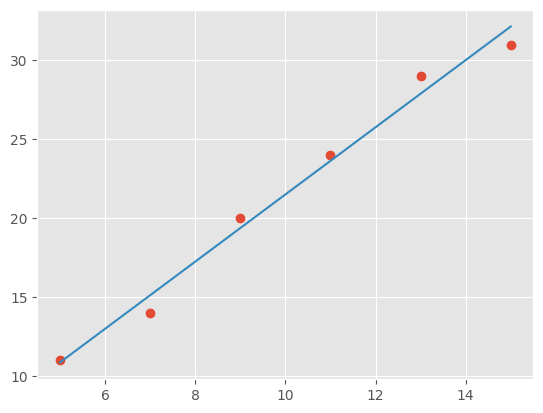

In [581]:
plt.plot(X,y,'o') # actual data
plt.plot(X,pred) # predicted data
plt.show()

shows the line of best fit

In [582]:
model.score(X,y)

0.9864918906909576

Agrees with the r2 from above

## Simple linear regression with automobile data
We will now use sklearn to to predict automobile milesage per gallon (mpg) and evaluate these predictions. We first load the data and split them into a training set and a testing set.

In [583]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head(10)

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

>**EXERCISE:**  Pick one variable to use as a predictor for simple linear regression.  Create a markdown cell below and discuss your reasons.  You may want to justify this with some visualizations.  Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors?

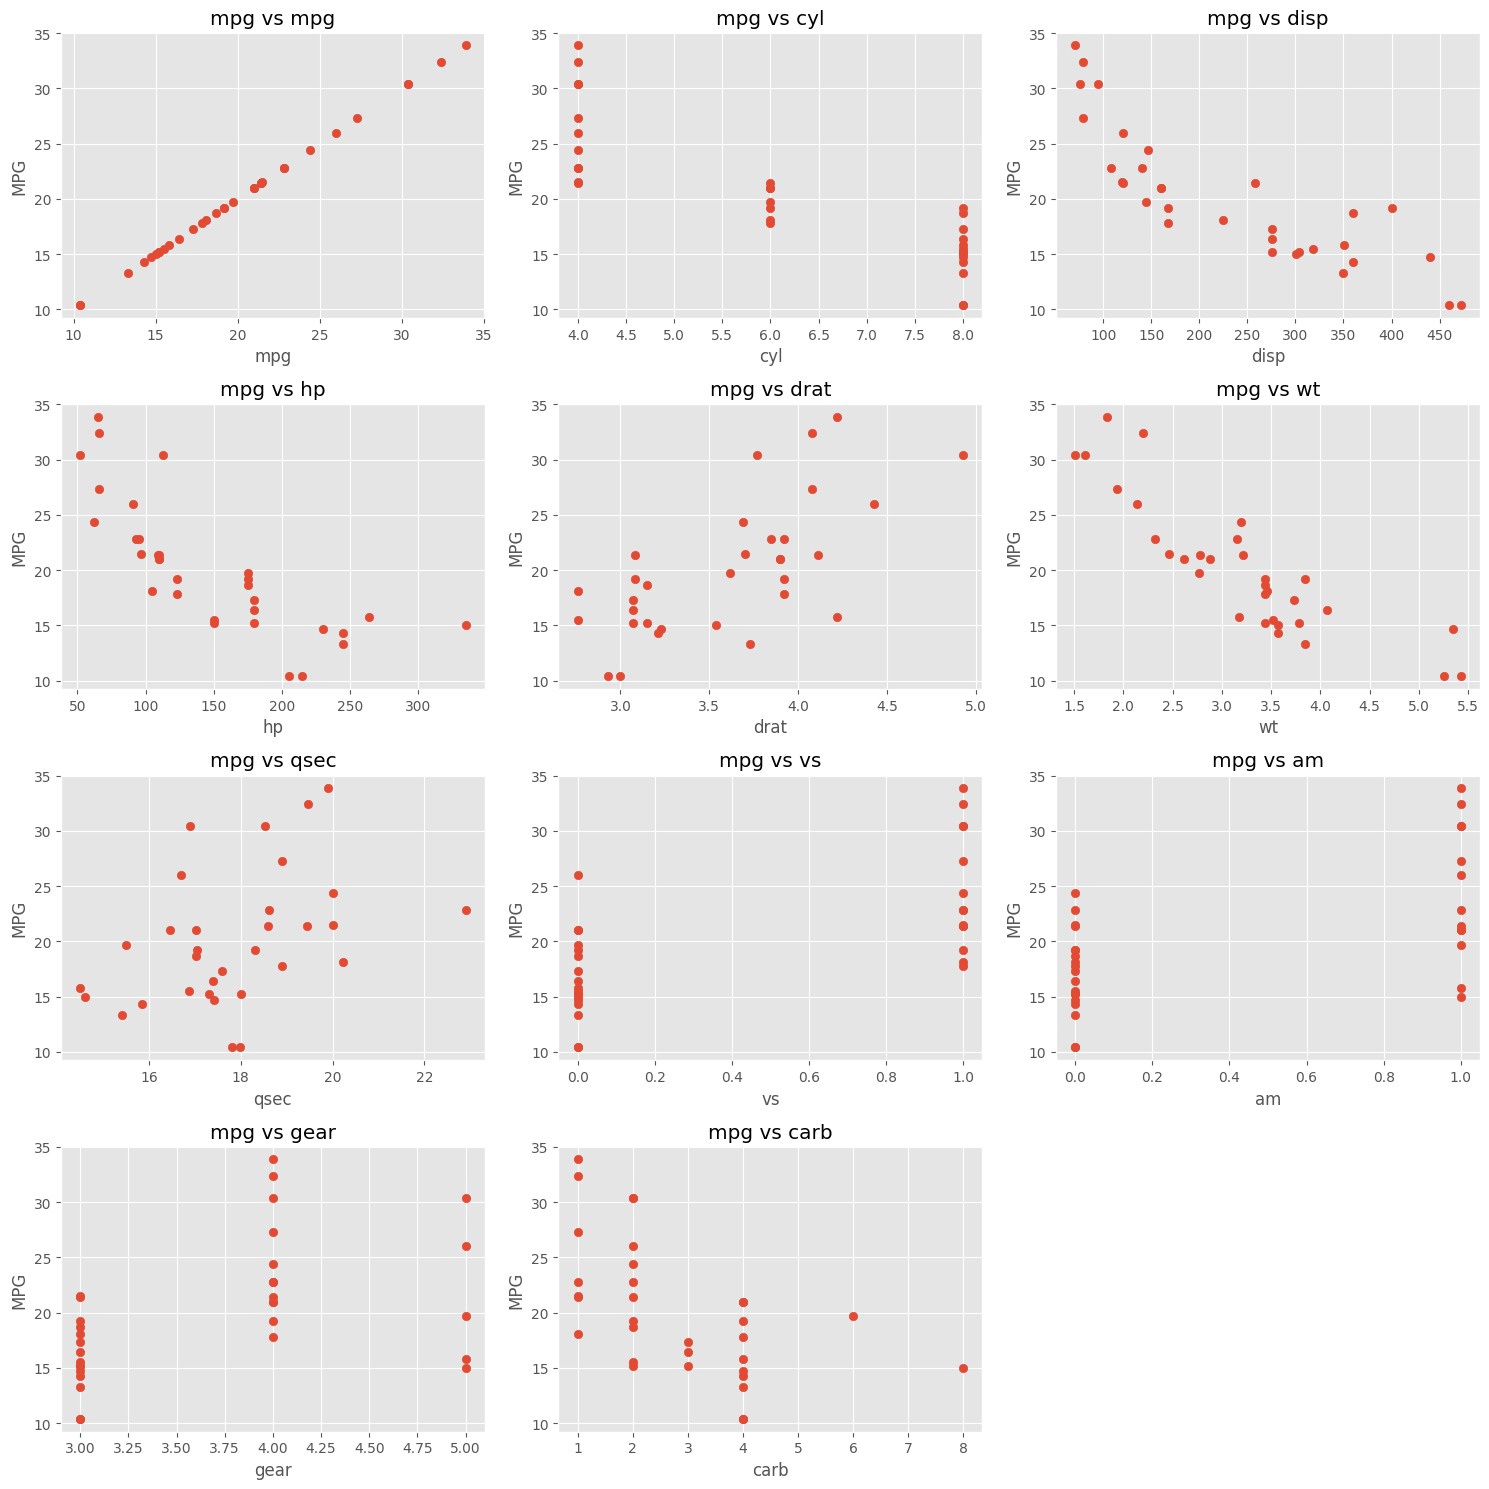

In [584]:
# Visualise data with scatterplot to see if datapoints line up in a linear fashion against mpg
scatterfilter = dfcars[["mpg", "cyl", "disp", "hp", "drat", "wt", "qsec", "vs", "am", "gear", "carb"]]
yax = dfcars["mpg"]

# Create a 4x3 grid of subplots
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through each column in scatterfilter and plot against mpg
for i, col in enumerate(scatterfilter.columns):
    axs[i].scatter(dfcars[col], yax)
    axs[i].set_title(f"mpg vs {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("MPG")

# Hide any unused subplots (if any)
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()



The scatterplots indicate a negative linear correlation in 'disp', 'wt' and 'hp' with 'mpg'. 

In [585]:
# check correlation coefficient for above 3 variables
print("mpg vs disp:\n",np.corrcoef(dfcars["mpg"], dfcars["disp"]))
print("mpg vs wt:\n",np.corrcoef(dfcars["mpg"], dfcars["wt"]))
print("mpg vs hp:\n",np.corrcoef(dfcars["mpg"], dfcars["hp"]))

mpg vs disp:
 [[ 1.         -0.84755138]
 [-0.84755138  1.        ]]
mpg vs wt:
 [[ 1.         -0.86765938]
 [-0.86765938  1.        ]]
mpg vs hp:
 [[ 1.         -0.77616837]
 [-0.77616837  1.        ]]


'wt' has the highest negative correlation coefficient at -0.867, therefore 'wt' will be used for the linear model

> **EXERCISE:** With sklearn fit the training data using simple linear regression. 

> Plot the data and the prediction.  

>Print out the mean squared error for the set

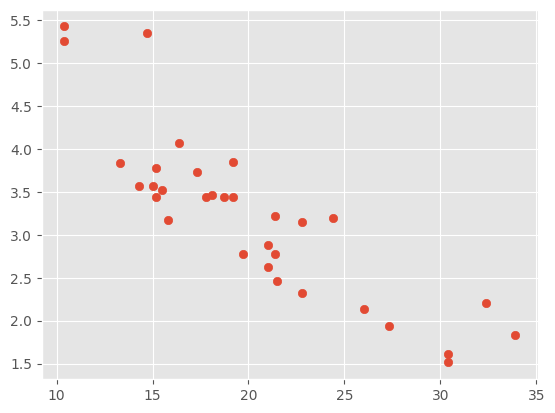

In [586]:
#your code here
#define  predictor and response for set
# + verify spread
y=dfcars['mpg']
X=dfcars['wt']
plt.scatter(y,X)
plt.show()

In [587]:
# verify shape and dimension for scikit-learn use
print("shape X:",X.shape,"dimensions:",X.ndim)
print("shape y:",y.shape,"dimensions:",y.ndim)

shape X: (32,) dimensions: 1
shape y: (32,) dimensions: 1


Both variables contain 1 dimensional data which is not suitable for Scikit-learn. The .reshape method will modify the data shape to 2 dimensional as required by Scikit-learn.<br>
<br>X.reshape(-1,1) 
- the first attribute -1: This tells NumPy the number of rows required for this dimension based on the total number of elements in X.”
- the second 1: This specifies that X should have 1 column.

In [588]:
#reshape data for scikit-learn
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [589]:
# verify shape and dimension for scikit-learn use
print("shape X:",X.shape,"dimensions:",X.ndim)
print("shape y:",y.shape,"dimensions:",y.ndim)

shape X: (32, 1) dimensions: 2
shape y: (32, 1) dimensions: 2


In [590]:
#comparing results from manual and scikit built-in method
#pred == manual_pred


In [591]:
#your code here
# create linear regression object with sklearn
from sklearn.linear_model import LinearRegression # load model
model = LinearRegression() # create model with LinearRegression

#your code here
# train the model and make predictions
model.fit(X,y) #train the model

#your code here
#print out coefficients
print("model coeficient:",model.coef_) # this is m in y=mx+b
print("model intercept:",model.intercept_) # this is b in y=mx+b
pred = model.predict(X) # this does "y = b + np.dot(m,X).reshape(1,-1)" for us
#print('predicted values:\n',pred)
#ize = pred.reshape(-1)
#izeX = X.reshape(-1)
#dftest=pd.DataFrame({'ize':ize,'izeX':izeX})
#dftest


model coeficient: [[-5.34447157]]
model intercept: [37.28512617]


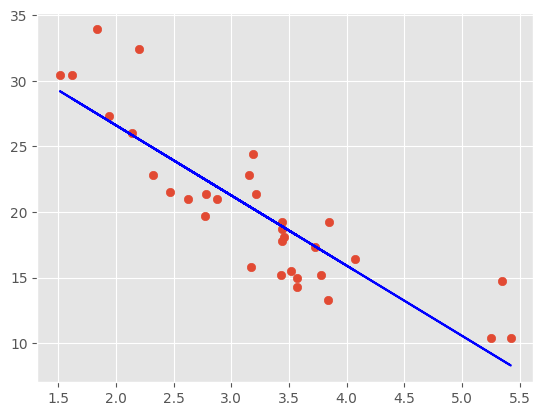

In [611]:
# your code here
# Plot outputs
y=dfcars['mpg']
X=dfcars['wt']
plt.scatter(X,y)
plt.plot(X,pred, color="blue")
plt.show()

In [593]:
from sklearn.metrics import mean_squared_error as mse #Mean Squared
from sklearn.metrics import r2_score as r2 # R-squared

print("error MSE:", mse(y,pred))
print("error R2:", r2(y,pred))

error MSE: 8.697560548229475
error R2? 0.7528327936582646


# Diabetes Dataset - Multiple linear regression 

Now we are going to fit the training data (from the diabetes dataset built into sklearn) using multiple linear regression with multiple predictors. 

In [594]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


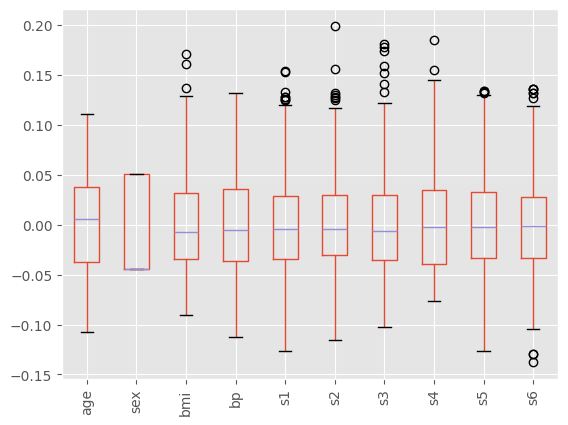

In [595]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data.boxplot(rot=90)
data.head()

Above I put the data into a pandas dataframe and then tried to visualise it. You will notice all of the data is in a similar range

### Normalised data
They all have a mean of 0 and standard deviation of 1. This is called Normalising the data and is a common step that I'll get into later on.

The obvious one you'll notice is the sex variable. This has two options which are 0.050680 or -0.044642, when usually with 2 options we would go with 0 and 1. The numbers were changed due to this normalisation

In [596]:
X = data 
y = diabetes.target

In [597]:
lr = LinearRegression()

In [598]:
lr.fit(X,y)

LinearRegression()

In [599]:
r_squared = lr.score(X,y)
r_squared

0.5177484222203499

Let's do a slightly different r2

In [600]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared

0.5065592904853232

In [601]:
lr.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [602]:
lr.intercept_

152.13348416289597

Text(0, 0.5, 'Coefficient')

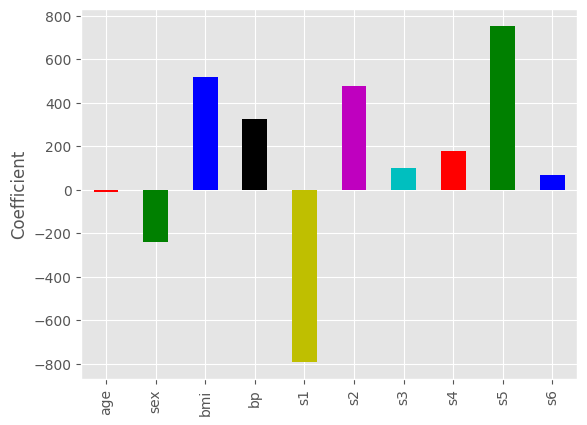

In [603]:
coef=pd.Series(lr.coef_ , index=diabetes.feature_names)
coef.plot(kind='bar', color = list('rgbkymc'))
plt.ylabel('Coefficient')

Some of those coefficients are very large, and it looks like age does not contribute as much as the others

The very large coefficients can often be problematic so we'll have to think about this one again later

Maybe removing age will give us a better model

We don't really have enough knowledge to figure it out. It's possible you would get a better model without age, s3, s4 and s6